In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

1. Самостоятельно постройте парные регрессии от каждого атрибута с целевой переменной.


In [ ]:
x10 = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2%20multivariate/data/10_x.csv', header=None)
y10 = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2%20multivariate/data/10_y.csv', header=None)

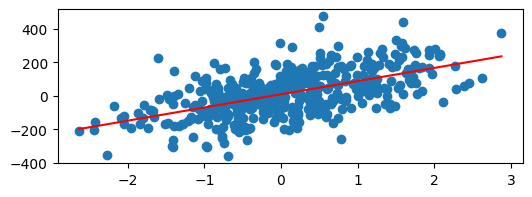

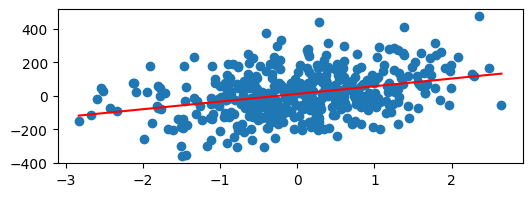

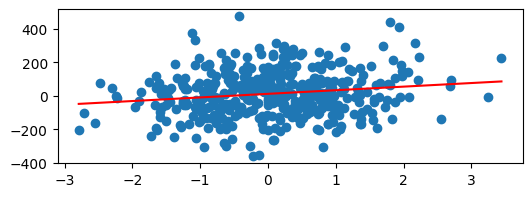

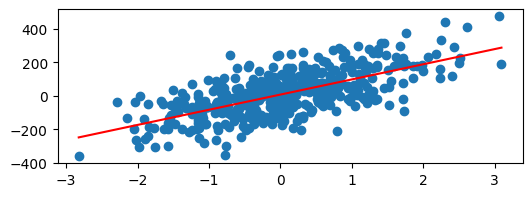

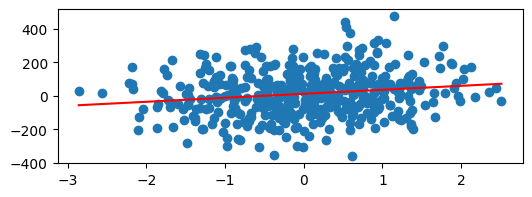

In [ ]:
list_modules = []
for i in range(5):
  module = LinearRegression()
  module.fit(x10[[i]], y10)
  xx = np.linspace(x10[[i]].min(),x10[[i]].max(), 100).reshape((-1, 1))
  plt.figure(figsize=(6, 2))
  plot = plt.scatter(x10[[i]], y10)
  line = plt.plot(xx, module.predict(xx), c='r')

2. (*) Модифицируйте код из предыдущей работы так, чтобы модель регрессии умела работать с входными данными, состоящими из произвольного количества столбцов.

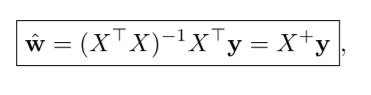

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, num_parametrs):
        self.b = np.zeros(num_parametrs)
    def predict(self, X):
        return X.dot(self.b)
    def error(self, X, Y):
        return (1/(2*X.shape[0]))*sum((Y - self.predict(X))**2)
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=500):
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            self.b = (np.linalg.inv(X.transpose().dot(X)).dot(X.transpose())).dot(Y)
            errors.append(self.error(X,Y))
        return steps, errors

In [ ]:
hyp = Model(x10.shape[1])
hyp.fit(X = x10.values, Y = y10.values)
hyp.error(X = x10.values, Y = y10.values)

array([46.69148485])

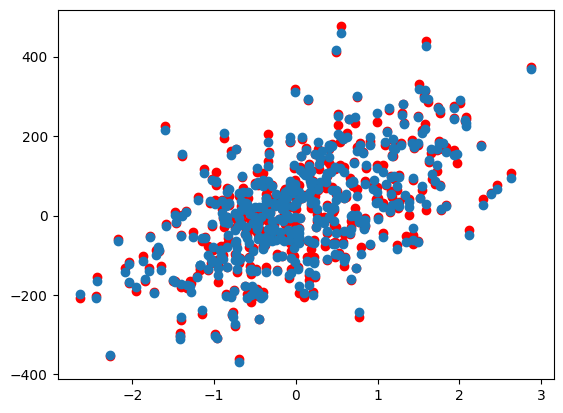

In [ ]:
plt.scatter(x10[[0]], y10, c = 'red')
plt.scatter(x10[[0]], hyp.predict(x10.values))

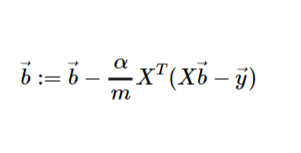

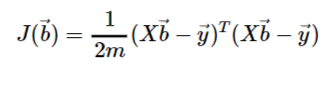

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, num_parametrs):
        self.b = np.zeros(num_parametrs).reshape(num_parametrs, 1)
    def predict(self, X):
        return X.dot(self.b)
    def error(self, X, Y):
        f = X.dot(self.b) - Y
        return (1/(2*X.shape[0]))*(f.T).dot(f)
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=10000):
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            f = (X.T).dot(X.dot(self.b) - Y)
            self.b -= alpha * (1/len(X)) * f
            errors.append(self.error(X,Y)[0][0])
            step += 1
            steps.append(step)
        return steps, errors

In [ ]:
hyp = Model(x10.shape[1])
step_, err = hyp.fit(X = x10.values, Y = y10.values)
hyp.error(X = x10.values, Y = y10.values)

array([[46.69174293]])

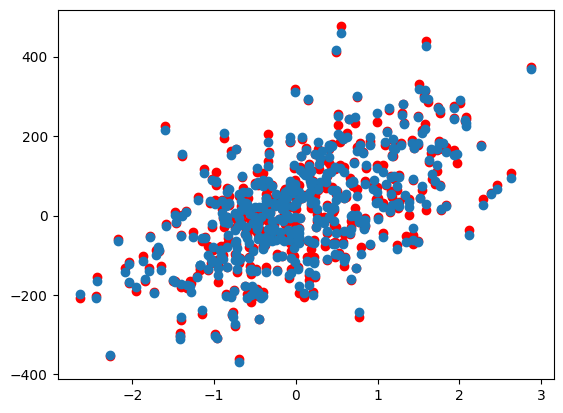

In [ ]:
plt.scatter(x10[[0]], y10, c = 'red')
plt.scatter(x10[[0]], hyp.predict(x10.values))

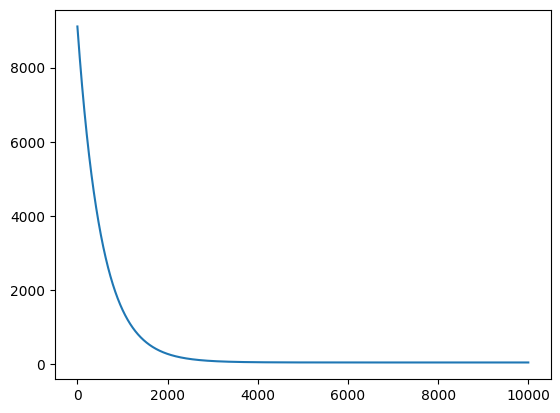

In [ ]:
plt.plot(step_, err)

3. Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

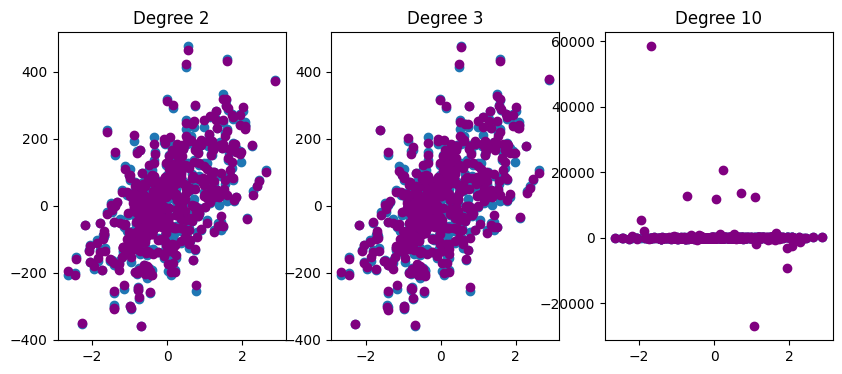

In [ ]:
poly2 = PolynomialFeatures(degree=2)
poly3 = PolynomialFeatures(degree=3)
poly10 = PolynomialFeatures(degree=10)
x = x10.iloc[:350,:]
y = y10.iloc[:350,:]
poly_features2 = poly2.fit_transform(x)
poly_reg_model2 = LinearRegression()
poly_reg_model2.fit(poly_features2, y)
x_fit2 = poly2.fit_transform(x10)

poly_features3 = poly3.fit_transform(x)
poly_reg_model3 = LinearRegression()
poly_reg_model3.fit(poly_features3, y)
x_fit3 = poly3.fit_transform(x10)

poly_features10 = poly10.fit_transform(x)
poly_reg_model10 = LinearRegression()
poly_reg_model10.fit(poly_features10, y)
x_fit10 = poly10.fit_transform(x10)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))
axes[0].scatter(x10[[0]], y10)
axes[0].scatter(x10[[0]], poly_reg_model2.predict(x_fit2), color='purple')
axes[1].scatter(x10[[0]], y10)
axes[1].scatter(x10[[0]], poly_reg_model3.predict(x_fit3), color='purple')
axes[2].scatter(x10[[0]], y10)
axes[2].scatter(x10[[0]], poly_reg_model10.predict(x_fit10), color='purple')

axes[0].set_title("Degree 2")
axes[1].set_title("Degree 3")
axes[2].set_title("Degree 10")
plt.show()

(-500.0, 500.0)

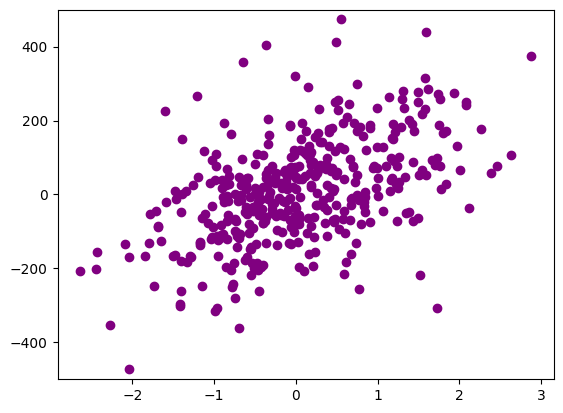

In [ ]:
plt.scatter(x10[[0]], poly_reg_model10.predict(x_fit10), color='purple')
plt.ylim(-500, 500)

4. Постройте сводную таблицу показателей точности всех построенных моделей. Сделайте вывод, какие модели переобученнные, какие - недообученные.
5. Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
models = [(poly_reg_model2, x_fit2), (poly_reg_model3, x_fit3), (poly_reg_model10, x_fit10)]
df = pd.DataFrame(index = ['Degree_2', 'Degree_3', 'Degree_10'], columns = ['MSE', 'RMSE', 'MAPE', 'R2'])

for i, model in enumerate(models):
  model, data = model
  df.MSE[i] = mean_squared_error(y10, model.predict(data)).round(3)
  df.RMSE[i] = mean_absolute_error(y10, model.predict(data)).round(3)
  df.MAPE[i] = mean_absolute_percentage_error(y10, model.predict(data)).round(3)
  df.R2[i] = r2_score(y10, model.predict(data)).round(3)

df

,MSE,RMSE,MAPE,R2
Degree_2,91.198,7.645,0.22,0.995
Degree_3,88.56,7.415,0.212,0.995
Degree_10,12276633.647,450.489,6.313,-678.388


6. (*) Замерьте время обучения полиномиальных моделей с разной степенью полинома. Сделайте вывод.

In [ ]:
import time
for i in range(11):
  start_time = time.time()
  poly = PolynomialFeatures(degree=i)
  poly_features = poly.fit_transform(x10)
  poly_reg_model = LinearRegression()
  er = poly_reg_model2.fit(poly_features, y10).score(poly_features, y10)
  print(f'Model (degree {i}): error = {er}, time = {time.time() - start_time}\n')


Model (degree 0): error = 0.0, time = 0.008441686630249023

Model (degree 1): error = 0.9948499482200298, time = 0.007962226867675781

Model (degree 2): error = 0.9950259931709341, time = 0.007067203521728516

Model (degree 3): error = 0.9954419354129093, time = 0.023461341857910156

Model (degree 4): error = 0.9962313653832229, time = 0.028275012969970703

Model (degree 5): error = 0.9976942776048601, time = 0.07230329513549805

Model (degree 6): error = 1.0, time = 0.13334035873413086

Model (degree 7): error = 1.0, time = 0.11443614959716797

Model (degree 8): error = 1.0, time = 0.1831057071685791

Model (degree 9): error = 1.0, time = 0.2537093162536621

Model (degree 10): error = 1.0, time = 0.34472012519836426

